In [1]:
# only adjust settings in this cell
state = 'MS'
root_name = 'Harrison'     # which county will root our district (or county_cluster==multi-district)?
k = 4                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 1               # size=1 for single district, size=2 for double district, ...
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 4 districts
We seek a multi-district (county cluster) of size = 1


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 740319
Single district upper population limit U = 740320


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Harrison County to be the root. In our graph, this is vertex # 21


In [6]:
from cluster import enumerate_top_districts
first_districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 654 rows, 771 columns and 3275 nonzeros
Model fingerprint: 0x19ce1025
Variable types: 405 continuous, 366 integer (366 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+06]
Presolve removed 89 rows and 87 columns
Presolve time: 0.01s
Presolved: 565 rows, 684 columns, 2723 nonzeros
Variable types: 401 continuous, 283 integer (283 binary)

Root relaxation: objective 2.420525e+00, 217 iterations, 0.00 seconds (0.00 work units)



 585686 224950   25.08133   29   70          -   22.16083      -  31.1  400s
 591994 226858   29.96556   48   51          -   22.19723      -  31.1  405s
found [7, 8, 12, 13, 21, 22, 31, 42, 58, 63, 70, 73, 74, 76] with objective = 33.0
   added to list!
 598034 228839   23.77224   30   16          -   22.22451      -  31.1  410s
 604726 230806   23.71869   41   14          -   22.26221      -  31.1  415s
 608599 232197   35.62471   34   11          -   22.27834      -  31.1  420s
found [5, 12, 16, 21, 22, 30, 32, 40, 44, 46, 61, 64, 67, 70, 74, 79] with objective = 44.0
   added to list!
 616088 234752   28.12768   26  135          -   22.31312      -  31.1  425s
 623019 237442   23.74748   38   67          -   22.34908      -  31.1  430s
 627466 239101   26.01787   41   80          -   22.37277      -  31.1  435s
 634026 241001   40.55133   51    4          -   22.40587      -  31.1  440s
 640996 243151   28.00000   49   14          -   22.44969      -  31.0  445s
 647733 245899   25

 1292336 446952 infeasible   43               -   25.00000      -  29.9  850s
 1297907 448303 infeasible   42               -   25.01643      -  29.9  855s
 1304683 450039   30.01250   31   11          -   25.04198      -  29.9  860s
 1310819 451154   31.09984   34   12          -   25.06335      -  29.9  865s
 1317727 452525   26.00000   31   15          -   25.08998      -  29.9  870s
 1325099 454146   27.38211   43   28          -   25.11554      -  29.9  875s
 1332181 455792   28.62563   33  100          -   25.14168      -  29.9  880s
 1338744 456982 infeasible   42               -   25.16456      -  29.8  885s
 1346623 458362   27.15383   29   96          -   25.19291      -  29.8  890s
 1352612 459587 infeasible   33               -   25.21639      -  29.8  895s
 1360264 460919 infeasible   41               -   25.24238      -  29.8  900s
 1368363 462805 infeasible   40               -   25.27072      -  29.8  905s
 1377715 464465   34.84929   36   83          -   25.30584      

 2116885 476607 infeasible   38               -   28.57687      -  28.1 1340s
 2126404 474972   29.18786   38   12          -   28.62591      -  28.1 1345s
 2134407 473295   30.85244   31   16          -   28.66898      -  28.0 1350s
 2144452 470875 infeasible   50               -   28.72877      -  28.0 1355s
 2153954 469030   29.39360   32   89          -   28.78353      -  28.0 1360s
 2161926 467371 infeasible   37               -   28.83045      -  28.0 1365s
 2170630 465491 infeasible   55               -   28.88269      -  27.9 1370s
 2179865 463806   30.13037   44   11          -   28.93906      -  27.9 1375s
 2189371 462235 infeasible   33               -   28.99840      -  27.9 1380s
 2200590 462612 infeasible   47               -   29.00000      -  27.8 1385s
 2210107 462846   29.30063   27   14          -   29.00000      -  27.8 1390s
 2218844 461914 infeasible   38               -   29.02531      -  27.8 1395s
 2227130 460278 infeasible   38               -   29.06060      

In no particular order, the top 10 clusters are:


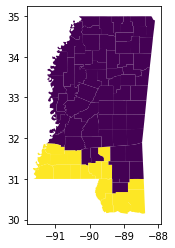

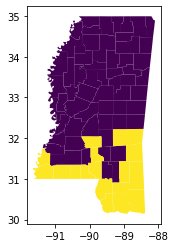

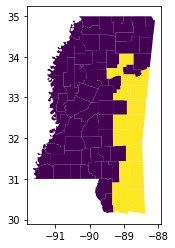

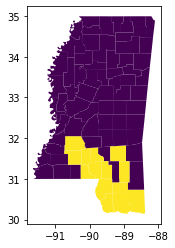

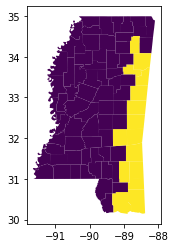

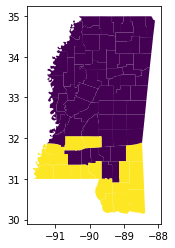

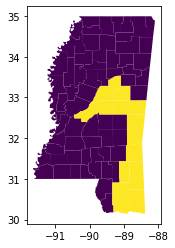

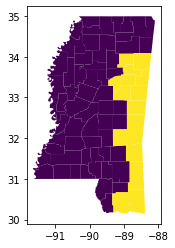

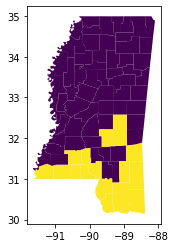

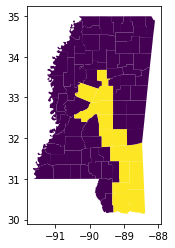

In [7]:
# Draw the first districts
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top",len(first_districts),"clusters are:")
for first_district in first_districts:
    draw_single_district( filepath, filename, G, first_district, zoom=False )

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 518 rows, 607 columns and 2569 nonzeros
Model fingerprint: 0x52429f3f
Variable types: 317 continuous, 290 integer (290 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 77 rows and 74 columns
Presolve time: 0.00s
Presolved: 441 rows, 533 columns, 2043 nonzeros
Variable types: 310 continuous, 223 integer (223 binary)

Root relaxation: objective 4.457034e+00, 141 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Ob

 547929 214397   30.50534   45   22          -   21.74729      -  21.0  260s
 559358 218750   30.31611   36   17          -   21.82667      -  21.0  265s
 569355 222051   34.30200   33   31          -   21.90348      -  20.9  270s
 577867 225208 infeasible   43               -   21.95830      -  20.9  275s
 588352 229458   48.18877   57    6          -   22.00000      -  20.8  280s
 600435 234706   31.09603   33   38          -   22.00000      -  20.8  285s
 608713 237739   25.03208   33   56          -   22.03836      -  20.8  290s
 618719 241599   25.07770   29   55          -   22.08564      -  20.8  295s
 630246 246018   26.22084   29   30          -   22.13786      -  20.8  300s
 643568 250492 infeasible   37               -   22.19472      -  20.7  305s
 655874 254965 infeasible   50               -   22.24415      -  20.7  310s
 668387 259761   37.33514   35   70          -   22.29864      -  20.7  315s
 680625 264316   23.18464   35   43          -   22.34931      -  20.6  320s

 1527836 563387   32.39326   37   24          -   24.94158      -  19.6  710s
 1539680 567087   35.07742   50    4          -   24.98382      -  19.6  715s
 1550480 570568   28.96603   45   44          -   25.00000      -  19.6  720s
 1563032 574945   35.56686   40   45          -   25.00000      -  19.6  725s
 1572366 578472 infeasible   30               -   25.00000      -  19.6  730s
 1580111 581897   31.81151   45   11          -   25.00000      -  19.6  735s
 1588625 584694 infeasible   32               -   25.02058      -  19.6  740s
found [5, 16, 18, 26, 37, 38, 41, 45, 46, 49, 53, 55, 67, 72, 78, 81] with objective = 36.0
   replaced worse solution with objective = 39.0
adding cut saying that objective should be less than 37.0
 1597381 587367   26.80155   46   16          -   25.04101      -  19.6  745s
 1605556 589914   31.15181   43   16          -   25.06174      -  19.6  750s
 1615262 592617   28.50018   49   23          -   25.08496      -  19.6  755s
 1625067 595383 infea

 2415422 775009 infeasible   29               -   27.00000      -  19.4 1140s
found [2, 3, 4, 5, 8, 14, 17, 19, 20, 23, 27, 29, 32, 34, 38, 43, 50, 51, 57, 59, 60, 61, 65, 66, 68, 69, 71, 80] with objective = 30.0
   replaced worse solution with objective = 31.0
adding cut saying that objective should be less than 30.999999999999993
 2425163 775803   28.95888   33   24          -   27.02529      -  19.4 1145s
 2436125 775321 infeasible   33               -   27.06831      -  19.4 1150s
 2445351 774246 infeasible   39               -   27.10147      -  19.4 1155s
 2454906 773362 infeasible   45               -   27.13861      -  19.4 1160s
 2464340 772253 infeasible   28               -   27.17509      -  19.4 1165s
 2473953 771189 infeasible   42               -   27.21491      -  19.4 1170s
 2482817 770186   28.81389   37   33          -   27.24901      -  19.4 1175s
 2491926 769103   29.21750   40    9          -   27.28365      -  19.4 1180s
 2504459 767769 infeasible   36          

 125935 41092   21.03541   37   31          -   20.02011      -  12.2   30s
 152678 36381 infeasible   30               -   21.00000      -  12.1   35s

Cutting planes:
  Lazy constraints: 25

Explored 153598 nodes (1858559 simplex iterations) in 35.13 seconds (7.18 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 311811, time in user-callback 1.76 sec


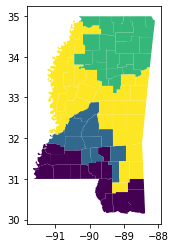

In [8]:
# code to find just one plan
from cluster import draw_plan
found = False

for first_district in first_districts:
    
    if found:
        break
    
    nondistrict = [ i for i in G.nodes if i not in first_district ]
    G2 = G.subgraph(nondistrict)
    G2._root = None
    G2._size = 1
    G2._k = 3
    G2._L = G._L
    G2._U = G._U
    second_districts = enumerate_top_districts( G2, obj_type=obj_type, enumeration_limit=10 )
    
    for second_district in second_districts:
        
        if found:
            break

        nondistrict2 = [ i for i in G.nodes if i not in first_district+second_district ]
        G3 = G.subgraph(nondistrict2)
        G3._root = None
        G3._size = 1
        G3._k = 2
        G3._L = G._L
        G3._U = G._U
        third_districts = enumerate_top_districts( G3, obj_type=obj_type, enumeration_limit=1 )

        for third_district in third_districts:

            fourth_district = [ i for i in G.nodes if i not in first_district+second_district+third_district ]
            plan = [ first_district, second_district, third_district, fourth_district ]
            draw_plan( filepath, filename, G, plan )
            found = True    

Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 518 rows, 607 columns and 2569 nonzeros
Model fingerprint: 0x52429f3f
Variable types: 317 continuous, 290 integer (290 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 77 rows and 74 columns
Presolve time: 0.01s
Presolved: 441 rows, 533 columns, 2043 nonzeros
Variable types: 310 continuous, 223 integer (223 binary)

Root relaxation: objective 4.457034e+00, 141 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Ob

 578335 225524   40.39142   52   29          -   21.96348      -  20.9  260s
 591347 231039   22.23162   35   37          -   22.00000      -  20.8  265s
 602851 235593 infeasible   37               -   22.01254      -  20.8  270s
 614278 239771 infeasible   45               -   22.06391      -  20.8  275s
 625687 244241   27.35440   35   22          -   22.12045      -  20.8  280s
 637256 248362 infeasible   50               -   22.16850      -  20.7  285s
 651397 253445   23.64108   45   37          -   22.22702      -  20.7  290s
 663109 257687   32.60319   32   29          -   22.27531      -  20.7  295s
 674782 261918 infeasible   35               -   22.32492      -  20.6  300s
 685299 265603 infeasible   41               -   22.36835      -  20.6  305s
found [2, 16, 25, 29, 32, 38, 44, 45, 50, 51, 61, 66, 69, 75, 80] with objective = 39.99999999999996
   added to list!
 698408 270610 infeasible   35               -   22.42242      -  20.6  310s
 707951 274004   26.24024   41    

 1510042 557847   29.43721   34   39          -   24.88526      -  19.6  710s
 1518931 560796 infeasible   45               -   24.91305      -  19.6  715s
 1527100 563251   30.01522   35   50          -   24.93964      -  19.6  720s
 1535767 565930 infeasible   36               -   24.96848      -  19.6  725s
 1545393 569081   31.05474   30   32          -   25.00000      -  19.6  730s
 1555993 572526   31.01563   41   16          -   25.00000      -  19.6  735s
 1565968 575965 infeasible   37               -   25.00000      -  19.6  740s
 1576642 580324   35.32488   40    6          -   25.00000      -  19.6  745s
 1587294 584269   29.16438   39    6          -   25.01779      -  19.6  750s
found [5, 16, 18, 26, 37, 38, 41, 45, 46, 49, 53, 55, 67, 72, 78, 81] with objective = 36.0
   replaced worse solution with objective = 39.0
adding cut saying that objective should be less than 37.0
 1597848 587603 infeasible   35               -   25.04322      -  19.6  755s
 1610559 591345   32.

found [2, 3, 4, 5, 8, 14, 16, 17, 19, 20, 23, 25, 27, 32, 34, 38, 43, 50, 51, 57, 59, 65, 66, 68, 69, 71, 80] with objective = 28.0
   replaced worse solution with objective = 31.0
adding cut saying that objective should be less than 31.0
 2345362 762689 infeasible   46               -   26.88595      -  19.4 1155s
 2352565 763053   28.66203   44    6          -   26.91515      -  19.4 1160s
 2359872 763454   30.00000   35   31          -   26.94764      -  19.4 1165s
 2367716 764088 infeasible   42               -   26.98146      -  19.4 1170s
 2377338 765812   29.65815   38   16          -   27.00000      -  19.4 1175s
 2387218 768019   28.37680   47   10          -   27.00000      -  19.4 1180s
 2396611 770211   30.20309   34   18          -   27.00000      -  19.4 1185s
 2405091 772369   28.89182   37   34          -   27.00000      -  19.4 1190s
 2413041 774378   29.81510   46   23          -   27.00000      -  19.4 1195s
 2418717 775508   29.28921   34   59          -   27.00448 

 51131 27493   19.16495   23   22          -   16.81289      -  12.3   15s
found [1, 6, 9, 23, 24, 25, 26, 30, 33, 37, 39, 44, 47, 48, 52, 55, 56, 60, 61, 62, 68, 71, 78] with objective = 22.0
   added to list!
adding cut saying that objective should be less than 22.0
 70556 36290   20.65832   27   54          -   17.39524      -  12.3   20s
 88370 39113 infeasible   34               -   18.48605      -  12.4   25s
 101333 40855   21.14325   36   37          -   19.07450      -  12.3   30s
 123430 40994   21.88325   36    5          -   20.00000      -  12.2   35s
 150486 36873 infeasible   32               -   21.00000      -  12.1   40s

Cutting planes:
  Lazy constraints: 25

Explored 153598 nodes (1858559 simplex iterations) in 40.84 seconds (7.18 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 311256, time in user-callback 0.99 sec
Set parameter LazyConstraints to value 1
S

Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 432 rows, 444 columns and 1970 nonzeros
Model fingerprint: 0x214a29ef
Variable types: 227 continuous, 217 integer (217 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 135 rows and 71 columns
Presolve time: 0.01s
Presolved: 297 rows, 373 columns, 1381 nonzeros
Variable types: 220 continuous, 153 integer (153 binary)

Root relaxation: objective 1.714595e+00, 171 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.71

 420406 146652 infeasible   29               -   21.54749      -  10.2  115s
 432303 150296   42.70567   32   33          -   21.67614      -  10.1  120s
 442426 153261   24.35671   26   19          -   21.78532      -  10.1  125s
 455078 156908   32.37500   34   16          -   21.92182      -  10.1  130s
 475226 163096 infeasible   30               -   22.02073      -  10.1  135s
 496319 168748 infeasible   29               -   22.19521      -  10.1  140s
 515010 173422   36.42151   37    6          -   22.34975      -  10.1  145s
 541339 180205   28.34119   28    4          -   22.55740      -  10.1  150s
 554609 183871   26.08690   25   23          -   22.66483      -  10.0  155s
 569837 188208   23.26744   30    6          -   22.79863      -  10.0  160s
 585499 191984   38.60297   32   32          -   22.93903      -  10.0  165s
 602601 196537   23.23147   28   12          -   23.00000      -  10.0  170s
 617794 200678 infeasible   31               -   23.09699      -  10.0  175s

     0     0    9.05096    0   42          -    9.05096      -     -    0s
     0     0    9.27204    0   43          -    9.27204      -     -    0s
     0     0    9.33668    0   43          -    9.33668      -     -    0s
     0     0    9.33668    0   43          -    9.33668      -     -    0s
     0     0    9.34129    0   44          -    9.34129      -     -    0s
     0     0    9.34129    0   44          -    9.34129      -     -    0s
     0     0    9.34282    0   44          -    9.34282      -     -    0s
     0     0    9.34282    0   44          -    9.34282      -     -    0s
     0     0    9.34282    0   44          -    9.34282      -     -    0s
     0     2    9.88778    0   44          -    9.88778      -     -    0s

Cutting planes:
  MIR: 5
  StrongCG: 3
  Flow cover: 11
  RLT: 1

Explored 134 nodes (935 simplex iterations) in 1.01 seconds (0.04 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, b


Optimize a model with 362 rows, 409 columns and 1741 nonzeros
Model fingerprint: 0x412c2157
Variable types: 209 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 76 rows and 60 columns
Presolve time: 0.00s
Presolved: 286 rows, 349 columns, 1314 nonzeros
Variable types: 203 continuous, 146 integer (146 binary)

Root relaxation: objective 1.714595e+00, 168 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.71460    0   45          -    1.71460      -     -    0s
     0     0    2.31546    0   47          -    2.31546      -     -    0s
     0     0    2.71994    0   50          -    2.71994      -     -    0s
     0     0    2.74137    0   50          -    2.74137   

found [2, 4, 8, 14, 17, 19, 25, 27, 31, 35, 38, 44, 47, 50, 51, 58, 65, 66, 68, 69, 75] with objective = 35.0
   added to list!
 102969 44812   26.04421   34   11          -   19.22806      -  20.3   45s
 113952 48931   37.80595   38   82          -   19.57742      -  20.2   50s
 124765 53317   21.03644   30   89          -   19.92827      -  20.2   55s
found [2, 4, 8, 9, 14, 20, 25, 31, 35, 38, 45, 50, 51, 56, 58, 60, 61, 65, 66, 68, 71] with objective = 39.0
   added to list!
found [2, 4, 8, 14, 16, 17, 19, 20, 29, 31, 32, 34, 35, 38, 45, 50, 51, 58, 65, 66, 69] with objective = 25.0
   added to list!
 136010 57285 infeasible   35               -   20.23142      -  20.1   60s
found [2, 4, 8, 14, 17, 19, 23, 25, 31, 35, 38, 50, 51, 58, 65, 66, 68, 69, 75] with objective = 28.0
   added to list!
 149215 62129   26.68975   41   21          -   20.57866      -  19.9   65s
 159452 65809   36.25931   47    9          -   20.86010      -  19.9   70s
 170581 70093   36.69864   40   28       

 861597 284961 infeasible   39               -   27.01102      -  17.8  390s
 871691 286181   30.94395   42   23          -   27.07899      -  17.8  395s
 882790 287446   28.47140   36    6          -   27.15507      -  17.8  400s
 893579 288547 infeasible   36               -   27.22270      -  17.8  405s
 904772 289706   27.36197   42   16          -   27.29443      -  17.8  410s
 915682 290777   28.95010   35   60          -   27.36837      -  17.8  415s
 924515 291838   32.06297   32   18          -   27.41998      -  17.8  420s
 934511 292910   30.45974   35   13          -   27.48980      -  17.8  425s
 944426 293862   31.00000   49    5          -   27.55672      -  17.8  430s
 955616 294769 infeasible   46               -   27.63144      -  17.7  435s
 965693 295577   31.00000   38    5          -   27.70834      -  17.7  440s
 975402 296351 infeasible   34               -   27.78039      -  17.7  445s
 986994 297450   30.31722   33   21          -   27.86584      -  17.7  450s

     0     0    4.55381    0   56          -    4.55381      -     -    0s
     0     0    4.55381    0   58          -    4.55381      -     -    0s
     0     0    4.55381    0   58          -    4.55381      -     -    0s
     0     0    4.55381    0   58          -    4.55381      -     -    0s
     0     2    4.63194    0   58          -    4.63194      -     -    0s
 24198  1559 infeasible   29               -   19.24861      -   8.0    5s

Cutting planes:
  Gomory: 4
  MIR: 2
  Flow cover: 3
  Mod-K: 9
  RLT: 2
  Lazy constraints: 21

Explored 27742 nodes (211388 simplex iterations) in 5.44 seconds (0.85 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 56538, time in user-callback 0.27 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU

Presolve removed 118 rows and 64 columns
Presolve time: 0.00s
Presolved: 225 rows, 305 columns, 1090 nonzeros
Variable types: 181 continuous, 124 integer (124 binary)

Root relaxation: objective 1.714594e+00, 143 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.71459    0   35          -    1.71459      -     -    0s
     0     0    2.28613    0   36          -    2.28613      -     -    0s
     0     0    2.72592    0   37          -    2.72592      -     -    0s
     0     0    2.81202    0   38          -    2.81202      -     -    0s
     0     0    2.98013    0   39          -    2.98013      -     -    0s
     0     0    2.98013    0   39          -    2.98013      -     -    0s
     0     2    3.70415    0   39          -    3.70415      -     -    0s
 16363  5550   24.71002   30   11          -   13.46829      -   9.

     0     2    3.30804    0   47          -    3.30804      -     -    0s
 21676  4500 infeasible   22               -   15.00000      -   7.8    5s
 48196  4665   25.88161   26    5          -   20.41168      -   7.1   10s

Cutting planes:
  Gomory: 2
  MIR: 2
  Flow cover: 4
  Mod-K: 8
  Lazy constraints: 15

Explored 66211 nodes (440569 simplex iterations) in 12.60 seconds (1.67 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 134095, time in user-callback 0.52 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 397 rows, 388 columns and 1748 nonzeros
Model finger

     0     0    6.21292    0   80          -    6.21292      -     -    0s
     0     0    6.22460    0   78          -    6.22460      -     -    0s
     0     0    6.22678    0   79          -    6.22678      -     -    0s
     0     0    6.26201    0   81          -    6.26201      -     -    0s
     0     0    6.26351    0   79          -    6.26351      -     -    0s
     0     0    6.28575    0   80          -    6.28575      -     -    0s
     0     0    6.28641    0   79          -    6.28641      -     -    0s
     0     0    6.31316    0   81          -    6.31316      -     -    0s
     0     0    6.32333    0   85          -    6.32333      -     -    0s
     0     0    6.32444    0   86          -    6.32444      -     -    0s
     0     0    6.33859    0   88          -    6.33859      -     -    0s
     0     0    6.34810    0   89          -    6.34810      -     -    0s
     0     0    6.34810    0   89          -    6.34810      -     -    0s
     0     2    6.76752  

 1023929 373697   32.54142   30   19          -   24.36189      -  15.7  440s
 1034287 376732 infeasible   47               -   24.40497      -  15.7  445s
 1044020 379713 infeasible   42               -   24.44092      -  15.6  450s
 1054530 383019   33.44016   36   19          -   24.48526      -  15.6  455s
 1063668 385832   28.47137   40    6          -   24.52333      -  15.6  460s
 1075426 389441   39.13355   45   10          -   24.57419      -  15.6  465s
 1086275 392513   32.09982   33   31          -   24.62506      -  15.6  470s
 1097473 396049   30.37222   41   28          -   24.67466      -  15.6  475s
 1109227 399156 infeasible   47               -   24.73145      -  15.6  480s
 1121416 402789   27.14181   39    7          -   24.78299      -  15.6  485s
 1135358 407411 infeasible   33               -   24.84920      -  15.6  490s
 1146911 410616   30.58972   36   11          -   24.90202      -  15.6  495s
 1157522 413989   32.57272   35   49          -   24.95058      

 2090443 678610   36.89727   40   13          -   27.57014      -  15.1  945s
 2097804 680371   32.27106   31   15          -   27.58993      -  15.1  950s
 2106454 682584   41.59822   40    6          -   27.61127      -  15.1  955s
 2117189 684978   33.32355   49   22          -   27.64008      -  15.1  960s
 2127122 687536 infeasible   36               -   27.66522      -  15.1  965s
 2137966 690788   45.21279   47    8          -   27.69091      -  15.1  970s
 2147979 693137   42.79279   40   48          -   27.71658      -  15.1  975s
 2158776 695847 infeasible   37               -   27.74868      -  15.1  980s
 2168625 698440   31.84769   31   57          -   27.77431      -  15.1  985s
found [4, 8, 14, 17, 20, 27, 34, 35, 36, 38, 43, 50, 51, 57, 58, 65, 66, 68, 75, 80] with objective = 43.0
   added to list!
found [2, 3, 4, 8, 20, 31, 34, 38, 50, 51, 58, 59, 65, 66, 68, 73, 75] with objective = 44.0
   added to list!
 2180086 701450 infeasible   38               -   27.80391    

 3063035 882782 infeasible   36               -   29.83641      -  14.9 1410s
 3071538 883683   32.17832   33   13          -   29.86268      -  14.9 1415s
 3081761 884617   32.92371   40    5          -   29.89924      -  14.9 1420s
 3092803 885903   33.47392   30   19          -   29.93395      -  14.9 1425s
 3107853 887525   30.38603   33   46          -   29.98403      -  14.9 1430s
 3118331 888921   30.51764   40   13          -   30.00000      -  14.9 1435s
 3130969 890965 infeasible   39               -   30.00000      -  14.9 1440s
 3145827 893408   33.04687   37   42          -   30.00000      -  14.8 1445s
 3158762 896355   35.67230   33   27          -   30.00000      -  14.8 1450s
 3170824 898031 infeasible   32               -   30.02348      -  14.9 1455s
 3179521 898772   35.07174   32   39          -   30.04619      -  14.8 1460s
 3188221 899612 infeasible   36               -   30.06666      -  14.8 1465s
 3200529 900866 infeasible   50               -   30.09729      

Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 8444005, time in user-callback 36.91 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 358 rows, 330 columns and 1516 nonzeros
Model fingerprint: 0xc7e4b402
Variable types: 163 continuous, 167 integer (167 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 293 rows and 157 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 2653, time in user-callback 0.01 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 385 rows, 340 columns and 1596 nonzeros
Model fingerprint: 0x12e47621
Variable types: 167 continuous, 173 integer (173 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 305 rows and 167 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is

     0     0    4.21637    0   43          -    4.21637      -     -    0s
     0     0    4.27808    0   50          -    4.27808      -     -    0s
     0     0    4.27966    0   50          -    4.27966      -     -    0s
     0     0    4.28187    0   49          -    4.28187      -     -    0s
     0     0    4.28655    0   47          -    4.28655      -     -    0s
     0     0    4.28655    0   47          -    4.28655      -     -    0s
     0     0    4.36407    0   46          -    4.36407      -     -    0s
     0     0    4.37369    0   46          -    4.37369      -     -    0s
     0     0    4.39707    0   47          -    4.39707      -     -    0s
     0     0    4.40394    0   47          -    4.40394      -     -    0s
     0     0    4.40679    0   50          -    4.40679      -     -    0s
     0     0    4.40716    0   53          -    4.40716      -     -    0s
     0     0    4.41657    0   49          -    4.41657      -     -    0s
     0     0    4.41856  

     0     0    8.74011    0   53          -    8.74011      -     -    0s
     0     0    8.76756    0   53          -    8.76756      -     -    0s
     0     0    8.76852    0   54          -    8.76852      -     -    0s
     0     0    8.77762    0   52          -    8.77762      -     -    0s
     0     0    8.81510    0   51          -    8.81510      -     -    0s
     0     0    8.81622    0   51          -    8.81622      -     -    0s
     0     0    8.81622    0   51          -    8.81622      -     -    0s
     0     0    8.81622    0   51          -    8.81622      -     -    0s
     0     2    8.99854    0   51          -    8.99854      -     -    0s

Cutting planes:
  Gomory: 2
  Cover: 1
  MIR: 7
  StrongCG: 1
  Flow cover: 12
  RLT: 3
  Lazy constraints: 1

Explored 1786 nodes (8329 simplex iterations) in 0.83 seconds (0.10 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-cal

 638063 217089   34.32258   31   60          -   25.05672      -  17.6  260s
found [2, 5, 7, 11, 14, 16, 17, 19, 23, 25, 27, 28, 31, 35, 36, 38, 44, 45, 57, 60, 61, 66, 68, 69, 71, 80] with objective = 31.0
   replaced worse solution with objective = 41.0
adding cut saying that objective should be less than 38.0
 648454 219971 infeasible   43               -   25.11541      -  17.6  265s
 656638 222246   26.37371   35   27          -   25.16580      -  17.6  270s
 667442 224705   26.27686   40   13          -   25.22999      -  17.6  275s
 674216 226495 infeasible   40               -   25.26923      -  17.6  280s
 681902 228408   31.51161   29   47          -   25.31887      -  17.6  285s
found [1, 2, 7, 9, 11, 14, 19, 25, 28, 31, 35, 36, 38, 45, 50, 51, 57, 60, 61, 65, 66, 80] with objective = 36.0
   replaced worse solution with objective = 38.0
adding cut saying that objective should be less than 37.0
 687927 229832 infeasible   35               -   25.35282      -  17.6  290s
 693

  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 78 rows and 60 columns
Presolve time: 0.01s
Presolved: 252 rows, 300 columns, 1161 nonzeros
Variable types: 172 continuous, 128 integer (128 binary)

Root relaxation: objective 1.714594e+00, 154 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.71459    0   42          -    1.71459      -     -    0s
     0     0    2.28613    0   43          -    2.28613      -     -    0s
     0     0    2.85766    0   44          -    2.85766      -     -    0s
     0     0    3.01439    0   44          -    3.01439      -     -    0s
     0     0    3.03232    0   46          -    3.03232      -     -    0s
     0     0    3.03232    0   46          -    3.03232      -     -    0s
     0 

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.71460    0   36          -    1.71460      -     -    0s
     0     0    2.63901    0   40          -    2.63901      -     -    0s
     0     0    2.93970    0   41          -    2.93970      -     -    0s
     0     0    3.10874    0   45          -    3.10874      -     -    0s
     0     0    3.12972    0   44          -    3.12972      -     -    0s
     0     0    3.18173    0   42          -    3.18173      -     -    0s
     0     0    3.19836    0   51          -    3.19836      -     -    0s
     0     0    3.20329    0   46          -    3.20329      -     -    0s
     0     0    3.20461    0   48          -    3.20461      -     -    0s
     0     0    3.20503    0   56          -    3.20503      -     -    0s
     0     0    3.23269    0   48          -    3.23269      -     -    0s
     0     0    3.23311    0   50          -    3.23311      -     -    0s
     0     0    3.2374

 384778 123723   27.44942   28   16          -   22.17851      -  10.3  120s
 399743 125426   26.00000   31    5          -   22.36772      -  10.3  125s
 413663 127000   22.65877   29   11          -   22.54679      -  10.3  130s
 430422 128654   24.10980   33    5          -   22.77397      -  10.3  135s
 443656 130078   27.86458   28   10          -   22.94526      -  10.3  140s
 459636 132727   27.58550   28   15          -   23.00000      -  10.2  145s
 472323 134111   26.68450   35   18          -   23.09670      -  10.2  150s
 486479 135190 infeasible   36               -   23.24571      -  10.2  155s
 498863 136079 infeasible   28               -   23.37111      -  10.2  160s
 513867 136893   26.55768   26   42          -   23.53270      -  10.2  165s
 527596 137762 infeasible   39               -   23.66760      -  10.2  170s
 540170 138550   26.62681   28    4          -   23.80311      -  10.2  175s
 549262 138993   26.54924   34    6          -   23.90607      -  10.2  180s

  9794   197 infeasible   26               -   15.63586      -   7.4    5s

Cutting planes:
  Gomory: 5
  Cover: 1
  MIR: 4
  StrongCG: 1
  Flow cover: 8
  Zero half: 1
  RLT: 9
  Lazy constraints: 19

Explored 10964 nodes (79347 simplex iterations) in 5.21 seconds (0.54 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 22743, time in user-callback 0.22 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 363 rows, 361 columns and 1611 nonzeros
Model fingerprint: 0xd0c8f8f3
Variable types: 181 continuous, 180 integer (180 binary)
Coefficient statistics:
  Matrix range  

 96583 46800   23.28970   29   57          -   18.15491      -  22.4   60s
 105695 51304 infeasible   33               -   18.26200      -  22.2   65s
 113963 54908   29.21165   35   46          -   18.38484      -  22.0   70s
 125730 60305   30.19654   39   59          -   18.56352      -  21.9   75s
 135796 64951   39.10421   36    8          -   18.74124      -  21.8   80s
 147225 69773 infeasible   55               -   18.95209      -  21.6   85s
 156542 74147   20.64630   31   38          -   19.00000      -  21.6   90s
 167243 79071 infeasible   32               -   19.12257      -  21.5   95s
 178494 84370   39.33949   49    7          -   19.23596      -  21.4  100s
 187144 88254   36.03077   43   14          -   19.31216      -  21.3  105s
 196789 92427   29.33620   31   36          -   19.41286      -  21.2  110s
 206833 96728 infeasible   46               -   19.51822      -  21.1  115s
 215302 100512   28.14408   42    7          -   19.62306      -  21.0  120s
found [2, 8,

 1152908 479582   27.02082   45   19          -   24.00350      -  19.0  570s
 1163640 483588   32.50882   41   17          -   24.03226      -  19.0  575s
 1172959 487015   27.24381   47    6          -   24.05772      -  19.0  580s
 1183311 490519 infeasible   42               -   24.08073      -  19.0  585s
 1192621 494084   36.29916   51   13          -   24.10378      -  19.0  590s
found [2, 8, 14, 19, 31, 35, 36, 38, 45, 58, 66, 68, 75, 80] with objective = 32.0
   added to list!
 1198921 496278 infeasible   40               -   24.11853      -  19.0  595s
 1208498 500182   37.28285   34   77          -   24.13899      -  19.0  600s
 1216134 502840   37.75188   45    6          -   24.15497      -  19.0  605s
 1223501 505141   38.85855   38   48          -   24.16872      -  18.9  610s
 1232475 508364   33.80139   34   23          -   24.18609      -  18.9  615s
 1242989 512314   45.63512   35   37          -   24.20583      -  18.9  620s
 1252949 516476   33.52751   40   20     

 2052952 790218   30.91455   45   17          -   25.86806      -  18.4 1020s
 2065032 793908 infeasible   41               -   25.89911      -  18.4 1025s
 2077491 797656 infeasible   33               -   25.92844      -  18.4 1030s
 2088761 800771   34.80957   49    9          -   25.95712      -  18.4 1035s
found [5, 9, 13, 16, 23, 25, 27, 29, 32, 38, 44, 45, 47, 56, 57, 60, 61, 67, 79, 80, 81] with objective = 34.0
   replaced worse solution with objective = 38.0
adding cut saying that objective should be less than 37.0
 2100645 804161   36.39945   44   26          -   25.99030      -  18.4 1040s
 2117913 809869 infeasible   51               -   26.00000      -  18.4 1045s
 2133196 815070   27.98002   42   64          -   26.00000      -  18.4 1050s
 2144513 819699   30.41143   41   14          -   26.00020      -  18.4 1055s
 2155367 822599 infeasible   36               -   26.02316      -  18.4 1060s
 2166685 825251   30.57489   44   28          -   26.04703      -  18.4 1065s
 2

 2873633 971903 infeasible   45               -   27.37619      -  18.2 1410s
 2882029 972723 infeasible   38               -   27.39547      -  18.2 1415s
 2889738 973603 infeasible   41               -   27.41140      -  18.2 1420s
 2896605 974440 infeasible   44               -   27.42673      -  18.2 1425s
 2905439 975419   29.99688   42   28          -   27.44599      -  18.2 1430s
 2912657 976271 infeasible   53               -   27.46099      -  18.2 1435s
 2921281 977082 infeasible   45               -   27.48315      -  18.2 1440s
 2928135 977796   30.14826   33   35          -   27.49932      -  18.2 1445s
 2936989 978743   28.14804   41   30          -   27.51984      -  18.2 1450s
 2945992 979597 infeasible   32               -   27.54090      -  18.2 1455s
 2954586 980498 infeasible   36               -   27.56017      -  18.2 1460s
 2960978 981160 infeasible   38               -   27.57400      -  18.1 1465s
 2967623 981860   29.49377   47   12          -   27.59079      

 3845732 975559 infeasible   41               -   29.48345      -  17.7 1865s
 3856659 972150 infeasible   39               -   29.51718      -  17.7 1870s
 3867989 968675   30.01474   39   58          -   29.55392      -  17.7 1875s
 3877417 965994 infeasible   39               -   29.58569      -  17.7 1880s
 3888940 961996 infeasible   50               -   29.62547      -  17.7 1885s
 3901739 957806 infeasible   43               -   29.67012      -  17.7 1890s
 3913346 954056   30.25886   44   48          -   29.71123      -  17.7 1895s
 3924214 950614 infeasible   35               -   29.75143      -  17.7 1900s
 3936886 946170 infeasible   49               -   29.80054      -  17.7 1905s
 3947744 942314   30.14049   49   27          -   29.84239      -  17.7 1910s
 3959835 937866 infeasible   42               -   29.89321      -  17.7 1915s
 3971719 933551 infeasible   43               -   29.94388      -  17.7 1920s
 3982125 929122 infeasible   39               -   29.98901      

     0     0    3.28710    0   56          -    3.28710      -     -    0s
     0     0    3.29467    0   55          -    3.29467      -     -    0s
     0     0    3.29467    0   55          -    3.29467      -     -    0s
     0     2    3.73382    0   55          -    3.73382      -     -    0s
 10451   861 infeasible   33               -   14.03990      -   7.7    5s

Cutting planes:
  Gomory: 6
  Cover: 4
  MIR: 2
  Flow cover: 15
  RLT: 7
  Lazy constraints: 16

Explored 12541 nodes (89703 simplex iterations) in 5.43 seconds (0.56 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 25743, time in user-callback 0.24 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|

     0     2    3.73987    0   47          -    3.73987      -     -    0s
 15301  6527   15.01350   36    4          -   11.34319      -  11.7    5s
 32018 12755   19.94985   25   14          -   13.00000      -  10.6   10s
 48503 18173   17.00000   32   13          -   14.15559      -  10.1   15s
 63093 22943   18.42839   40    4          -   15.00000      -   9.9   20s
 77525 26512 infeasible   31               -   15.85419      -   9.6   25s
 90763 29796 infeasible   33               -   16.56439      -   9.4   30s
 105102 33175   23.88533   26   40          -   17.22283      -   9.3   35s
 117025 35077   25.79802   35    8          -   17.95983      -   9.2   40s
 136471 36171   31.45235   38    7          -   19.32552      -   9.0   45s
 165492 32933 infeasible   29               -   22.27901      -   8.7   50s
 197282 22128 infeasible   31               -   26.79718      -   8.4   55s

Cutting planes:
  Gomory: 2
  MIR: 1
  Lazy constraints: 115

Explored 234777 nodes (1791644 s

     0     0    3.37770    0   40          -    3.37770      -     -    0s
     0     0    3.39567    0   44          -    3.39567      -     -    0s
     0     0    3.40645    0   45          -    3.40645      -     -    0s
     0     0    3.40645    0   45          -    3.40645      -     -    0s
     0     0    3.40645    0   45          -    3.40645      -     -    0s
     0     2    3.65113    0   45          -    3.65113      -     -    0s
 20767  6072   14.84791   28    6          -   14.00000      -   8.0    5s
 41158  9680   23.26533   27    8          -   16.11453      -   8.1   10s
 70690  8325 infeasible   30               -   20.00000      -   7.3   15s

Cutting planes:
  Gomory: 1
  MIR: 1
  Flow cover: 3
  Zero half: 6
  Mod-K: 5
  Lazy constraints: 27

Explored 93422 nodes (613913 simplex iterations) in 17.43 seconds (2.53 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callbac

found [2, 5, 14, 16, 17, 19, 25, 29, 32, 34, 38, 44, 45, 47, 50, 51, 57, 60, 61, 65, 66, 69, 80] with objective = 26.0
   added to list!
 443382 173152   28.23872   36   36          -   22.25070      -  18.6  175s
 458099 179259   30.00000   43   10          -   22.33329      -  18.5  180s
 470287 183717   32.06540   33   54          -   22.41155      -  18.4  185s
 482248 188540   25.80581   24   87          -   22.48488      -  18.4  190s
 495705 193716   40.58168   39   23          -   22.56790      -  18.4  195s
 507836 198711   33.10178   36   46          -   22.64032      -  18.4  200s
 522778 204280   32.19925   48    6          -   22.74608      -  18.3  205s
 534909 208755   29.00000   38    7          -   22.83534      -  18.3  210s
found [2, 5, 14, 16, 19, 32, 38, 45, 50, 51, 57, 66, 68, 69, 75] with objective = 34.0
   added to list!
 548087 213845 infeasible   37               -   22.92732      -  18.3  215s
 557844 217850   37.30902   39   23          -   23.00000      - 

 1334937 471511 infeasible   49               -   26.09840      -  17.5  560s
 1341712 472839 infeasible   43               -   26.12753      -  17.5  565s
 1349872 474252   27.84603   32   22          -   26.16104      -  17.5  570s
 1356991 475660   33.63249   45    6          -   26.18776      -  17.5  575s
 1364450 476952   30.38635   33   94          -   26.22008      -  17.5  580s
 1372144 478381   32.42625   35   37          -   26.24946      -  17.5  585s
 1380341 480083   30.47103   45   23          -   26.27879      -  17.5  590s
 1388259 481629   26.36923   41    6          -   26.30912      -  17.5  595s
 1397963 483353   31.29919   46   10          -   26.34727      -  17.5  600s
found [2, 5, 14, 17, 25, 38, 45, 51, 56, 57, 60, 61, 66, 69, 71, 75, 80] with objective = 30.0
   replaced worse solution with objective = 34.0
adding cut saying that objective should be less than 33.0
 1408876 484984 infeasible   34               -   26.39361      -  17.5  605s
 1417250 486134 in

     0     0    2.28613    0   40          -    2.28613      -     -    0s
     0     0    2.74514    0   43          -    2.74514      -     -    0s
     0     0    2.83145    0   42          -    2.83145      -     -    0s
     0     0    2.85671    0   46          -    2.85671      -     -    0s
     0     0    2.85692    0   46          -    2.85692      -     -    0s
     0     0    2.85692    0   46          -    2.85692      -     -    0s
     0     0    2.85692    0   46          -    2.85692      -     -    0s
     0     0    2.85692    0   46          -    2.85692      -     -    0s
     0     2    3.49283    0   46          -    3.49283      -     -    0s
 22575  7794   22.45799   30   12          -   14.11358      -   8.7    5s
 52794 15897   23.04743   32   12          -   17.36114      -   7.9   10s
 85091 13807 infeasible   31               -   21.85859      -   7.5   15s

Cutting planes:
  Gomory: 5
  RLT: 1
  Lazy constraints: 34

Explored 104095 nodes (684766 simplex 

 34474 14293   15.40598   26   26          -   14.16720      -  10.3   10s
 56054 21607   19.30928   34   10          -   15.29646      -   9.7   15s
 80545 29974   18.80937   33   21          -   16.20397      -   9.5   20s
 98511 35483   20.03948   33   11          -   16.80696      -   9.3   25s
 114886 40316   22.19451   30   16          -   17.21080      -   9.3   30s
 129856 44181   31.00000   38    3          -   17.69946      -   9.2   35s
 145548 48254   22.00000   35    3          -   18.14518      -   9.1   40s
 158262 50545 infeasible   40               -   18.54576      -   9.1   45s
 173195 53200 infeasible   34               -   19.00000      -   9.0   50s
 188489 56393   27.14082   35   11          -   19.38558      -   9.0   55s
 210035 60834   26.37301   30   13          -   20.00000      -   8.9   60s
 230445 64845   27.17296   40   12          -   20.42503      -   8.8   65s
 246418 67747 infeasible   39               -   20.84100      -   8.7   70s
 261336 70532   

     0     0    3.01274    0   44          -    3.01274      -     -    0s
     0     0    3.06179    0   46          -    3.06179      -     -    0s
     0     0    3.06474    0   47          -    3.06474      -     -    0s
     0     0    3.24264    0   49          -    3.24264      -     -    0s
     0     0    3.24653    0   50          -    3.24653      -     -    0s
     0     0    3.24719    0   50          -    3.24719      -     -    0s
     0     0    3.26564    0   43          -    3.26564      -     -    0s
     0     0    3.32106    0   54          -    3.32106      -     -    0s
     0     0    3.32377    0   54          -    3.32377      -     -    0s
     0     0    3.32386    0   56          -    3.32386      -     -    0s
     0     0    3.32931    0   55          -    3.32931      -     -    0s
     0     0    3.32933    0   58          -    3.32933      -     -    0s
     0     0    3.36141    0   59          -    3.36141      -     -    0s
     0     0    3.36207  

     0     0    3.00663    0   45          -    3.00663      -     -    0s
     0     0    3.00853    0   43          -    3.00853      -     -    0s
     0     0    3.00853    0   43          -    3.00853      -     -    0s
     0     2    3.22520    0   43          -    3.22520      -     -    0s
 18482  4977   29.57706   26   25          -   14.41619      -   8.6    5s

Cutting planes:
  Gomory: 4
  StrongCG: 1
  Lazy constraints: 21

Explored 49461 nodes (374080 simplex iterations) in 10.04 seconds (1.51 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 99832, time in user-callback 0.68 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical

 251003 97626 infeasible   42               -   21.21892      -  19.3  110s
 262608 101115   26.35993   25   44          -   21.46420      -  19.2  115s
 276550 105261   28.43934   38   13          -   21.76054      -  19.2  120s
 290214 109787   34.76073   31   40          -   22.00000      -  19.1  125s
 304830 114091 infeasible   32               -   22.24112      -  19.0  130s
 318762 117993   25.38620   25   64          -   22.46593      -  18.9  135s
 329953 121684   22.77714   24   45          -   22.67890      -  18.9  140s
 343745 126030   24.61283   32   62          -   22.94211      -  18.8  145s
 354652 129554   33.50431   31   57          -   23.00997      -  18.7  150s
 363490 132456   36.78493   35   36          -   23.12382      -  18.7  155s
 375590 135752   28.34635   39    5          -   23.27580      -  18.6  160s
 388531 139320   25.50079   32   34          -   23.46316      -  18.6  165s
 400287 142468 infeasible   53               -   23.66129      -  18.5  170s


 1508562 458699   40.38318   40    9          -   31.02563      -  15.8  610s
 1519862 461490   43.61012   37    6          -   31.06019      -  15.8  615s
 1529715 463618   48.24191   39   25          -   31.09250      -  15.8  620s
 1539771 465973   38.08690   36   50          -   31.12555      -  15.7  625s
found [0, 2, 17, 18, 19, 26, 37, 38, 44, 53, 57, 60, 69, 73, 75, 78, 80, 81] with objective = 38.0
   added to list!
 1550501 468997 infeasible   47               -   31.15779      -  15.7  630s
 1564358 472478   38.01522   35    7          -   31.20005      -  15.7  635s
 1576080 475339   34.09036   41    6          -   31.23661      -  15.7  640s
 1588776 478915   41.88888   36   14          -   31.27151      -  15.7  645s
 1604400 482614   35.30795   45   14          -   31.32106      -  15.7  650s
 1615882 485643   47.60722   41    7          -   31.35631      -  15.6  655s
 1626237 488167   35.63096   30   18          -   31.38546      -  15.6  660s
found [2, 4, 8, 9, 17, 18

 2544284 687844   41.87181   46   10          -   33.86552      -  14.7 1060s
 2553285 689619   35.10336   37   22          -   33.89200      -  14.7 1065s
 2565111 691670   42.00000   38    3          -   33.92735      -  14.7 1070s
 2575825 693573   34.66579   37   37          -   33.95724      -  14.7 1075s
 2589649 696246   34.64160   43   10          -   33.99829      -  14.7 1080s
 2606441 699481 infeasible   40               -   34.00000      -  14.7 1085s
 2619062 702566   35.27772   44   11          -   34.00000      -  14.7 1090s
 2633336 705959   34.62258   37    4          -   34.00000      -  14.7 1095s
 2643429 708909 infeasible   38               -   34.00000      -  14.7 1100s
 2651661 710442   37.02644   38    8          -   34.01587      -  14.7 1105s
 2663174 712475   39.90324   39   58          -   34.04089      -  14.7 1110s
 2675339 714216   34.81805   34   16          -   34.06585      -  14.6 1115s
 2684131 715432   40.12382   48   22          -   34.08616      

 3793951 810849   40.57585   40    7          -   36.29018      -  14.0 1575s
 3808811 811100   41.34270   37   13          -   36.31741      -  14.0 1580s
 3829241 810962 infeasible   35               -   36.35094      -  14.0 1585s
 3847911 811290 infeasible   35               -   36.38715      -  13.9 1590s
 3868231 811067 infeasible   48               -   36.42203      -  13.9 1595s
 3882763 811311   40.95672   42   11          -   36.45103      -  13.9 1600s
 3898186 811439   41.00000   43    5          -   36.48110      -  13.9 1605s
 3912440 812378   40.15220   42   18          -   36.50553      -  13.9 1610s
 3926801 812880 infeasible   36               -   36.53289      -  13.9 1615s
 3938370 812688   41.22306   30   81          -   36.55373      -  13.9 1620s
 3953738 813029   39.39641   40    7          -   36.58112      -  13.9 1625s
 3967258 813526   40.21149   42    9          -   36.60753      -  13.9 1630s
 3983859 813992   37.05439   34   13          -   36.64136      

  Flow cover: 10
  Mod-K: 2
  Network: 1
  RLT: 5

Explored 449 nodes (2224 simplex iterations) in 1.04 seconds (0.08 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 1456, time in user-callback 0.02 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 412 rows, 337 columns and 1637 nonzeros
Model fingerprint: 0xeb6b2f0c
Variable types: 165 continuous, 172 integer (172 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 246 rows and 181 c

Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 339 rows and 76 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 47, time in user-callback 0.00 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 439 rows, 304 columns and 1604 nonzeros
Model fingerprint: 0x31142d6e
Variable types: 147 continuous, 157 integer (157 binary)
Coefficient statistics:
  Matr

 681844 277043 infeasible   44               -   22.86476      -  16.2  275s
 695272 281651   37.02177   43    7          -   22.94790      -  16.2  280s
 709017 286943   30.69004   37    9          -   23.00000      -  16.2  285s
 721190 291696   25.66238   42   42          -   23.00118      -  16.2  290s
 732761 295853   41.68344   43    7          -   23.05503      -  16.2  295s
 745818 300570 infeasible   44               -   23.11204      -  16.2  300s
 760561 306057 infeasible   36               -   23.16933      -  16.2  305s
 771917 309900 infeasible   45               -   23.21511      -  16.2  310s
 784951 314673 infeasible   35               -   23.26423      -  16.2  315s
 798777 319296   41.17847   43   23          -   23.31225      -  16.2  320s
 812350 324048   26.81185   37   30          -   23.36211      -  16.2  325s
 826053 329347   27.10049   31   14          -   23.41208      -  16.2  330s
 839382 333782 infeasible   39               -   23.46564      -  16.1  335s

 1881806 682822   47.13026   48   24          -   26.37938      -  15.6  770s
 1899224 688255 infeasible   45               -   26.41716      -  15.6  775s
found [2, 4, 7, 8, 11, 14, 17, 19, 27, 28, 31, 35, 36, 38, 42, 45, 50, 51, 57, 58, 66, 68, 69, 71] with objective = 33.0
   added to list!
 1914459 692976   33.56622   42   11          -   26.44786      -  15.6  780s
 1926497 696445 infeasible   36               -   26.47349      -  15.6  785s
 1940386 700857   42.83696   40   52          -   26.50512      -  15.6  790s
 1951336 704154   31.27704   32   38          -   26.53060      -  15.6  795s
 1964191 708409   34.22235   44    6          -   26.55911      -  15.6  800s
 1978169 712763   33.23668   39   52          -   26.58854      -  15.6  805s
found [3, 8, 19, 20, 31, 34, 38, 39, 50, 51, 58, 59, 65, 66, 69, 80] with objective = 41.0
   added to list!
 1990965 716547   39.54012   43   15          -   26.61846      -  15.6  810s
found [8, 17, 20, 24, 27, 38, 39, 50, 51, 56, 59, 

 2811303 932400   30.16749   39    8          -   28.20079      -  15.5 1180s
 2818618 932946 infeasible   32               -   28.22117      -  15.5 1185s
 2825691 933668   34.68978   43   16          -   28.24048      -  15.5 1190s
 2833542 934318   28.78314   42    4          -   28.26304      -  15.5 1195s
 2842940 935029   31.12462   38   48          -   28.29051      -  15.5 1200s
 2852736 935823   30.35562   35   37          -   28.31852      -  15.5 1205s
 2861968 936649 infeasible   39               -   28.34443      -  15.5 1210s
 2868864 937176   31.22291   44   13          -   28.36293      -  15.5 1215s
 2876927 937795 infeasible   47               -   28.38633      -  15.5 1220s
 2883529 938281 infeasible   35               -   28.40583      -  15.5 1225s
 2889883 938705   34.15467   39   27          -   28.42316      -  15.5 1230s
 2897970 939312   33.02003   44   19          -   28.44774      -  15.5 1235s
 2907466 940258   32.33326   42   14          -   28.47418      


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 8218627, time in user-callback 37.68 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 310 rows, 326 columns and 1416 nonzeros
Model fingerprint: 0xc3daef3d
Variable types: 163 continuous, 163 integer (163 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 193 rows and 137 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Mode

     0     0    3.78105    0   34          -    3.78105      -     -    0s
     0     0    3.82968    0   37          -    3.82968      -     -    0s
     0     0    3.82968    0   37          -    3.82968      -     -    0s
     0     0    3.82968    0   37          -    3.82968      -     -    0s
     0     0    3.82968    0   37          -    3.82968      -     -    0s
     0     2    4.29376    0   37          -    4.29376      -     -    0s

Cutting planes:
  Gomory: 2
  MIR: 2
  StrongCG: 1
  Flow cover: 4
  RLT: 2
  Lazy constraints: 20

Explored 12559 nodes (92469 simplex iterations) in 3.20 seconds (0.42 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 25930, time in user-callback 0.19 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

C

Variable types: 201 continuous, 132 integer (132 binary)

Root relaxation: objective 1.714595e+00, 131 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.71460    0   32          -    1.71460      -     -    0s
     0     0    2.28613    0   33          -    2.28613      -     -    0s
     0     0    2.74119    0   37          -    2.74119      -     -    0s
     0     0    2.78672    0   37          -    2.78672      -     -    0s
     0     0    2.85402    0   40          -    2.85402      -     -    0s
     0     0    2.89547    0   40          -    2.89547      -     -    0s
     0     0    2.90541    0   41          -    2.90541      -     -    0s
     0     0    2.97344    0   43          -    2.97344      -     -    0s
     0     0    3.00324    0   43          -    3.00324      -     -    0s
     0     0    3.00846    

     0     0    5.15731    0   26          -    5.15731      -     -    0s
     0     0    5.26642    0   27          -    5.26642      -     -    0s
     0     0    5.28037    0   27          -    5.28037      -     -    0s
     0     0    5.42625    0   30          -    5.42625      -     -    0s
     0     0    5.43660    0   30          -    5.43660      -     -    0s
     0     0    5.43660    0   30          -    5.43660      -     -    0s
     0     0    5.43911    0   29          -    5.43911      -     -    0s
     0     0    5.43911    0   29          -    5.43911      -     -    0s
     0     2    6.16871    0   29          -    6.16871      -     -    0s

Cutting planes:
  MIR: 6
  Flow cover: 9
  Network: 1
  RLT: 2

Explored 130 nodes (676 simplex iterations) in 0.27 seconds (0.02 work units)
Thread count was 8 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 566, time in user-callback 0.01 sec
S

 1126260 423171   30.03123   40    4          -   27.73307      -  13.6  230s
 1141902 427352 infeasible   34               -   27.80078      -  13.6  235s
 1162647 432623   32.66019   37   20          -   27.90400      -  13.6  240s
 1183425 437961   30.72701   38    5          -   28.00000      -  13.6  245s
 1209393 446063 infeasible   31               -   28.03306      -  13.6  250s
found [9, 14, 17, 20, 23, 25, 27, 31, 34, 35, 36, 38, 39, 50, 51, 59, 65, 66, 71] with objective = 35.0
   replaced worse solution with objective = 37.0
adding cut saying that objective should be less than 37.0
 1232168 451754   36.84545   35   32          -   28.11247      -  13.6  255s
 1256151 457442   30.38600   36    5          -   28.19132      -  13.6  260s
found [2, 8, 9, 14, 17, 19, 25, 30, 31, 33, 34, 35, 36, 38, 47, 50, 51, 57, 60, 65, 66, 68, 69, 71, 80] with objective = 32.0
   replaced worse solution with objective = 37.0
adding cut saying that objective should be less than 37.0
 1278235 4

     0     0    7.14596    0   51          -    7.14596      -     -    0s
     0     0    7.14977    0   53          -    7.14977      -     -    0s
     0     0    7.14998    0   54          -    7.14998      -     -    0s
     0     0    7.18947    0   52          -    7.18947      -     -    0s
     0     0    7.20137    0   54          -    7.20137      -     -    0s
     0     0    7.22072    0   53          -    7.22072      -     -    0s
     0     0    7.22371    0   56          -    7.22371      -     -    0s
     0     0    7.22373    0   56          -    7.22373      -     -    0s
     0     0    7.22602    0   56          -    7.22602      -     -    0s
     0     0    7.22602    0   56          -    7.22602      -     -    0s
     0     2    7.34490    0   56          -    7.34490      -     -    0s

Cutting planes:
  Gomory: 4
  MIR: 3
  StrongCG: 3
  Flow cover: 11
  RLT: 16
  Lazy constraints: 3

Explored 5649 nodes (19046 simplex iterations) in 0.95 seconds (0.19 work

Presolve time: 0.00s
Presolved: 201 rows, 259 columns, 948 nonzeros
Variable types: 153 continuous, 106 integer (106 binary)

Root relaxation: objective 1.760466e+00, 127 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.76047    0   31          -    1.76047      -     -    0s
     0     0    2.68044    0   33          -    2.68044      -     -    0s
     0     0    2.86217    0   34          -    2.86217      -     -    0s
     0     0    2.87367    0   34          -    2.87367      -     -    0s
     0     0    2.87367    0   34          -    2.87367      -     -    0s
     0     0    2.87367    0   34          -    2.87367      -     -    0s
     0     2    3.67443    0   34          -    3.67443      -     -    0s
 35876  4708 infeasible   26               -   18.21743      -   8.8    5s

Cutting planes:
  Gomory: 2
  RLT


Optimize a model with 360 rows, 297 columns and 1433 nonzeros
Model fingerprint: 0x59d27be7
Variable types: 145 continuous, 152 integer (152 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 257 rows and 115 columns
Presolve time: 0.00s
Presolved: 103 rows, 182 columns, 482 nonzeros
Variable types: 97 continuous, 85 integer (85 binary)

Root relaxation: objective 1.139121e+01, 57 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.39121    0   12          -   11.39121      -     -    0s
     0     0   11.98122    0   13          -   11.98122      -     -    0s
     0     0   12.18498    0   11          -   12.18498      -     -    0s
     0     0   12.30651    0    7          -   12.30651      

 1259136 240638 infeasible   44               -   37.30441      -  13.7  260s
found [2, 4, 8, 9, 16, 17, 19, 25, 30, 32, 38, 41, 43, 44, 47, 56, 57, 58, 61, 67, 72, 81] with objective = 47.0
   added to list!
 1287730 242040 infeasible   46               -   37.50891      -  13.6  265s
 1312513 243473 infeasible   40               -   37.69124      -  13.6  270s
 1336220 244522   44.09801   39    7          -   37.88720      -  13.5  275s
 1361048 245538 infeasible   46               -   38.00000      -  13.5  280s
 1383404 247137   38.81015   40   15          -   38.09082      -  13.5  285s
 1406317 247169   42.88408   39    6          -   38.25095      -  13.4  290s
 1431132 247311   40.00000   45    7          -   38.42362      -  13.4  295s
 1455928 247335   40.31911   41   48          -   38.61532      -  13.4  300s
 1482935 247889   40.55856   49   11          -   38.82164      -  13.3  305s
 1507856 248002 infeasible   43               -   39.00000      -  13.3  310s
found [1, 2


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 13353, time in user-callback 0.08 sec
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 485 rows, 306 columns and 1700 nonzeros
Model fingerprint: 0x446184df
Variable types: 147 continuous, 159 integer (159 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 353 rows and 67 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    6.09116    0   21          -    6.09116      -     -    0s
     0     0    7.04656    0   25          -    7.04656      -     -    0s
     0     0    7.41542    0   21          -    7.41542      -     -    0s
     0     0    7.44665    0   20          -    7.44665      -     -    0s
     0     0    7.53246    0   29          -    7.53246      -     -    0s
     0     0    7.57443    0   27          -    7.57443      -     -    0s
     0     0    7.60098    0   31          -    7.60098      -     -    0s
     0     0    7.61752    0   27          -    7.61752      -     -    0s
     0     0    7.62131    0   31          -    7.62131      -     -    0s
     0     0    7.63521    0   32          -    7.63521      -     -    0s
     0     0    7.63546    0   32          -    7.63546      -     -    0s
     0     0    7.64090    0   33          -    7.64090      -     -    0s
     0     0    7.6409

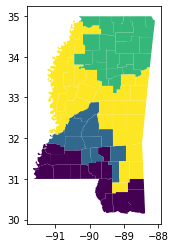

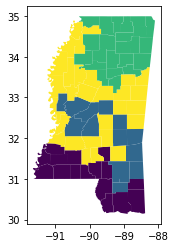

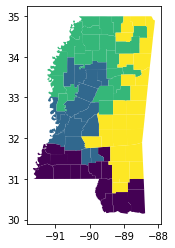

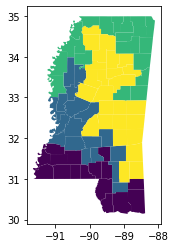

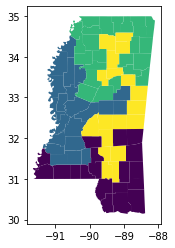

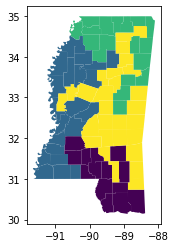

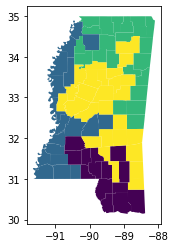

In [9]:
# code to find possibly many plans
for first_district in first_districts:
    
    nondistrict = [ i for i in G.nodes if i not in first_district ]
    G2 = G.subgraph(nondistrict)
    G2._root = None
    G2._size = 1
    G2._k = 3
    G2._L = G._L
    G2._U = G._U
    second_districts = enumerate_top_districts( G2, obj_type=obj_type, enumeration_limit=10 )
    
    for second_district in second_districts:
        
        nondistrict2 = [ i for i in G.nodes if i not in first_district+second_district ]
        G3 = G.subgraph(nondistrict2)
        G3._root = None
        G3._size = 1
        G3._k = 2
        G3._L = G._L
        G3._U = G._U
        third_districts = enumerate_top_districts( G3, obj_type=obj_type, enumeration_limit=10 )

        for third_district in third_districts:

            fourth_district = [ i for i in G.nodes if i not in first_district+second_district+third_district ]
            plan = [ first_district, second_district, third_district, fourth_district ]
            draw_plan( filepath, filename, G, plan )